# 词袋模型与TF-IDF（ENG)

词袋模型
1. 就是用来计算词频的，牺牲词之间的相互关系
词袋模型（Bag of Words, BoW）是一种在自然语言处理（NLP）和信息检索（IR）中广泛使用的文本表示技术。在词袋模型中，文本（比如一句话或一个文档）被表示为一个装着其词语的“袋子”，而词语的顺序则被忽略。这意味着文档被描述为词语出现的频率，而不考虑其在文档中的位置或者相互之间的关系。这个模型的简单性是其既是优点也是缺点。

### 工作原理
1. **词汇表创建**：首先，需要创建一个包含文本数据集中所有不同词语的列表，称为词汇表。
2. **文档表示**：接着，每个文档都被转换成一个向量，其长度等于词汇表的大小。向量的每一个元素是特定词语在文档中出现的次数或者是这个词语的权重（例如TF-IDF权重）。

### 应用
- **文本分类**：词袋模型可以用于训练分类器进行文本分类，如垃圾邮件检测、情感分析等。
- **文档聚类**：通过将文档转换为向量，可以使用各种聚类算法来识别文档集中的自然分组。
- **信息检索**：在搜索引擎中，词袋模型可以帮助确定查询与一组文档的相关性。
- **特征提取**：作为机器学习模型的输入，为更复杂的NLP任务提供基础特征。

### 优缺点
**优点**：
- 简单易于实现。
- 在许多情况下，尤其是在文档级别的任务中，效果不错。

**缺点**：
- 忽略了词语之间的顺序和句法结构，可能会丢失文本的某些语义信息。
- 词汇表通常很大，导致生成的向量维度高，可能需要大量的存储空间和计算资源。
- 对于同义词和多义词处理不佳，因为它只是简单地将词语视为独立的单位。

尽管词袋模型有其局限性，但它仍然是很多NLP任务的有效起点。对于复杂任务，可以考虑使用更高级的模型，如Word2Vec、GloVe或BERT，它们能够捕捉词语之间的关系和语义信息。我们一起学习这些概念时，可以深入探讨这些高级模型如何克服词袋模型的局限性。


In [6]:
import numpy
import matplotlib
import wordcloud
import nltk
import sklearn


In [9]:
# 首先导入Pandas库
import pandas as pd
import re
from nltk.stem import PorterStemmer
# 这里不能是 import pandas
# 一定要加pd



# 读取数据

In [10]:
import pandas as pd

# 确保文件路径正确，且包含了正确的文件扩展名
file_path = '/Users/siliang/Downloads/text_analysis_twitter.csv'
data = pd.read_csv(file_path)

# 查看数据的前几行
print(data.head())


   Unnamed: 0                  id   screen_name                       time  \
0           0  881004944714866688  KamalaHarris  2017-07-01T00:22:01-04:00   
1           1  881002538341986304    MarcVeasey  2017-07-01T00:12:28-04:00   
2           2  881001393284419584  RepPaulTonko  2017-07-01T00:07:55-04:00   
3           3  881000301007958016     clairecmc  2017-07-01T00:03:34-04:00   
4           4  881015727540637696       tedcruz  2017-07-01T01:04:52-04:00   

                                                link  \
0  https://www.twitter.com/KamalaHarris/statuses/...   
1  https://www.twitter.com/kylegriffin1/statuses/...   
2  https://www.twitter.com/RepPaulTonko/statuses/...   
3  https://www.twitter.com/clairecmc/statuses/881...   
4  https://www.twitter.com/larry_kudlow/statuses/...   

                                                text               source  
0  Republicans are trying to steal health care fr...        Sprout Social  
1  RT @kylegriffin1 Rep. Mark Veasay has i

# 报错举例：加载文件的时候，没加拓展名

In [12]:


# 替换下面的路径为你的文件实际路径
file_path = '/Users/siliang/Downloads/text_analysis_twitter.csv'
data = pd.read_csv(file_path)

# 查看数据的前几行
print(data.head())


   Unnamed: 0                  id   screen_name                       time  \
0           0  881004944714866688  KamalaHarris  2017-07-01T00:22:01-04:00   
1           1  881002538341986304    MarcVeasey  2017-07-01T00:12:28-04:00   
2           2  881001393284419584  RepPaulTonko  2017-07-01T00:07:55-04:00   
3           3  881000301007958016     clairecmc  2017-07-01T00:03:34-04:00   
4           4  881015727540637696       tedcruz  2017-07-01T01:04:52-04:00   

                                                link  \
0  https://www.twitter.com/KamalaHarris/statuses/...   
1  https://www.twitter.com/kylegriffin1/statuses/...   
2  https://www.twitter.com/RepPaulTonko/statuses/...   
3  https://www.twitter.com/clairecmc/statuses/881...   
4  https://www.twitter.com/larry_kudlow/statuses/...   

                                                text               source  
0  Republicans are trying to steal health care fr...        Sprout Social  
1  RT @kylegriffin1 Rep. Mark Veasay has i

导入方式2

In [26]:
#导入数据
text_ana  = pd.read_csv('/Users/siliang/Downloads/text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'],axis=1)

In [33]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('/Users/siliang/Downloads/text_analysis_weibo.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


# jieba分词

In [34]:
# pip install jieba
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/h0/_znycv1j413dcrzbt4jm4gt40000gn/T/jieba.cache
Loading model cost 0.303 seconds.
Prefix dict has been built successfully.


0    # 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言...
1                                                 转发 C
2    【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能...
3    丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程...
4        诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！
Name: 标题/微博内容, dtype: object

In [35]:
text = list(text_ana['标题/微博内容'].dropna())
text

['# 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言 自 在 人心   \u200b \u200b',
 '转发 C',
 '【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能 唱 跳 不 设限 ， 运动 联 濛 开 新年 🇨 🇳   期待 全能 音乐 人 @ 刘雨昕   与 # 运动 者 联 濛 # 一起 ， 为 冬奥 赛事 助力 加油 ！ 】',
 '丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] #   ✨ # 丁程鑫   二十 成金筑梦鑫 世界 #   大年初一 锁定 @ 北京 卫视   和 门面 主舞 @ 时代 少年 团 - 丁程鑫   一起 过大年 ， 拥抱 冰雪 ， 致敬 冬奥 ！',
 '诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！',
 '转发 C',
 '# 熊猫 守护者 ## 全面 二 创冰墩 墩 # 北京 冬奥会 如火如荼 地 进行 中 ， 滚滚 我 的 好 朋友 冰墩 墩 也 十分 活跃 ， 看 滚滚 我 做 一组 舒展 运动 ， 为 中国 健儿 加油 鼓 劲儿 ！ [ 嘻嘻 ] [ 嘻嘻 ]   http : / / t . cn / A6ilerDZ   视频 来源 ： @ 桃花源 生态 保护 基金会   \u200b \u200b \u200b',
 '转发 C',
 '2022 北京 冬奥会 加油 ！ 冰墩 墩 雪容融 也 非常 可爱 ！ 期待 我国 奥运健儿 们 的 精彩 表现 [ 开学 季 ] # 云 支教 迎 冬奥 #   \u200b \u200b',
 '和 @ TFBOYS - 易 烊 千玺   一起 助力 东奥 ！ 一起 向 未来 ！',
 '转发 C',
 '[ 心 ]',
 '守护 [ 心 ]',
 '# 易 烊 千玺 邀 你 唱响 一起 向 未来 #   / / @ M28 号 星球 : # 易 烊 千玺 邀 你 唱响 一起 向 未来 #   26.17',
 '/ / @ 翔霖 神谕 : 感谢 @ 爱奇艺   的 分享 。 新年 胜 旧年 ， 春妍 惹 绚烂 ， 万事 胜意 与 平安 喜乐 的 祝福 徒增 和 乐 ， @ 时代 少年 团 - 严浩翔   @ 

# 构建词袋模型

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 602)


In [37]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['0414' '1020' '167' '17' '18' '19' '2022' '25' '26' '50' 'a669n33f'
 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2' 'a6igrcur' 'a6ikvewj'
 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2' 'a6mn51qh' 'a6xwbtdu' 'an35'
 'c2021' 'call' 'cn' 'cosmo' 'cosmo5' 'cup' 'heytea' 'http' 'into1' 'kiki'
 'liveshow' 'lm' 'm28' 'mv' 'rap' 'tfboys' 'to19' 'um' 'vocal' 'wzy'
 'yyds' '一个' '一休' '一天' '一定' '一封' '一届' '一张' '一日' '一片' '一种' '一组' '一起' '一辈子'
 '丁哥' '丁程鑫' '万事' '万里' '三珩' '不仅' '不停' '不是' '不畏' '不要' '不要脸' '不语' '世界' '东奥'
 '东方' '东西' '东进' '严浩翔' '中华' '中国' '中国画' '中国队' '中央美术学院' '丰富多彩' '主舞' '之后' '之火'
 '之约' '之美' '了解' '二十' '产生' '京东' '人心' '人生' '什么' '他们' '代入' '代表团' '代言' '代言人'
 '以此' '休息' '优秀' '会长' '传播' '位列' '位送' '低沉' '你们' '你好' '便是' '保护' '信号' '健儿'
 '兄弟' '全能' '全面' '公道' '六个' '共祝' '关心' '关注' '关键' '其中' '养乐多' '兼好' '再说' '写下'
 '冠军' '冬天' '冬奥' '冬奥会' '冬季' '冬日' '冬梦之约' '冰墩' '冰壶' '冰雪' '准时' '凝聚' '出演'
 '出言不逊' '分享' '刘耀文' '刘雨昕' '刚刚开始' '创冰墩' '前辈' '加油' '加盟' '助力' '助威' '助阵' '努力'
 '劲儿' '勇士' '北京' '十八' '十八岁' '十六个' '十分' '十大' '千玺' '单人滑' '单届' 

In [38]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# 词频统计

In [39]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [40]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

602

In [41]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('转发', 33),
 ('冬奥', 30),
 ('一起', 29),
 ('北京', 25),
 ('刘雨昕', 20),
 ('运动', 18),
 ('加油', 17),
 ('少年', 14),
 ('cn', 13),
 ('http', 13),
 ('冬奥会', 12),
 ('未来', 12),
 ('冰雪', 11),
 ('健儿', 10),
 ('宋亚轩', 10),
 ('时代', 10),
 ('call', 9),
 ('期待', 8),
 ('中国', 7),
 ('全能', 6),
 ('分享', 6),
 ('徐坤', 6),
 ('我们', 6),
 ('超话', 6),
 ('into1', 5),
 ('丁程鑫', 5),
 ('冰墩', 5),
 ('努力', 5),
 ('周深', 5),
 ('感谢', 5),
 ('林墨', 5),
 ('真的', 5),
 ('自己', 5),
 ('金牌', 5),
 ('音乐', 5),
 ('关注', 4),
 ('助力', 4),
 ('卫视', 4),
 ('后援会', 4),
 ('唱响', 4),
 ('尹浩宇', 4),
 ('新年', 4),
 ('春晚', 4),
 ('朱一龙', 4),
 ('李宇春', 4),
 ('歌手', 4),
 ('温柔', 4),
 ('致敬', 4),
 ('赛场', 4),
 ('19', 3),
 ('一定', 3),
 ('不是', 3),
 ('千玺', 3),
 ('卡布', 3),
 ('可以', 3),
 ('声音', 3),
 ('奥运健儿', 3),
 ('官方', 3),
 ('害羞', 3),
 ('张哥', 3),
 ('日常', 3),
 ('时间', 3),
 ('明星', 3),
 ('涵江', 3),
 ('照亮', 3),
 ('照顾', 3),
 ('燕京啤酒', 3),
 ('生日', 3),
 ('直播', 3),
 ('相信', 3),
 ('相约', 3),
 ('祝福', 3),
 ('罗一舟', 3),
 ('视频', 3),
 ('觉得', 3),
 ('赛事', 3),
 ('越来越', 3),
 ('进行', 3),
 ('一个', 2),
 ('一辈子', 2),
 (

# 词云图

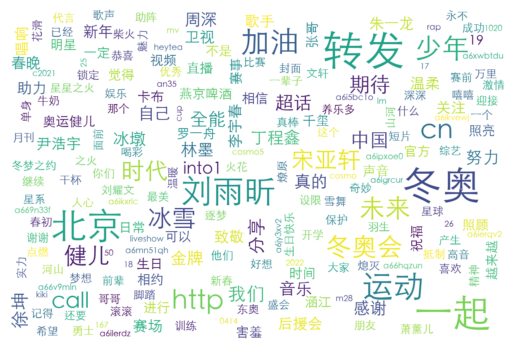

In [43]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='/System/Library/Fonts/STHeiti Light.ttc',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
截取片段数据

In [14]:
text = pd.read_csv('/Users/siliang/Downloads/text_analysis_twitter.csv', nrows=100)
text = text.drop(['Unnamed: 0'],axis=1)

In [15]:
# 查看读取的数据
print(text)

                    id    screen_name                       time  \
0   881004944714866688   KamalaHarris  2017-07-01T00:22:01-04:00   
1   881002538341986304     MarcVeasey  2017-07-01T00:12:28-04:00   
2   881001393284419584   RepPaulTonko  2017-07-01T00:07:55-04:00   
3   881000301007958016      clairecmc  2017-07-01T00:03:34-04:00   
4   881015727540637696        tedcruz  2017-07-01T01:04:52-04:00   
..                 ...            ...                        ...   
95  881162685638991872  RepRobinKelly  2017-07-01T10:48:50-04:00   
96  881161516715827200      RepRaskin  2017-07-01T10:44:11-04:00   
97  881160434426015746   GregoryMeeks  2017-07-01T10:39:53-04:00   
98  881160236807184385   SenatorLeahy  2017-07-01T10:39:06-04:00   
99  881160226451402752     repcleaver  2017-07-01T10:39:03-04:00   

                                                 link  \
0   https://www.twitter.com/KamalaHarris/statuses/...   
1   https://www.twitter.com/kylegriffin1/statuses/...   
2   https://

In [16]:
print(type(text))


<class 'pandas.core.frame.DataFrame'>


In [17]:
text = list(list['text'])[:100]

In [19]:
for i, item in enumerate(text):
    print(f"Item {i}: {item} (type: {type(item)})")
    if i >= 10:  # 只打印前10个元素来避免输出太多
        break


Item 0: *list['text'] (type: <class 'types.GenericAlias'>)


In [18]:

text = " ".join(text)
text

TypeError: sequence item 0: expected str instance, types.GenericAlias found

In [ ]:
# 假设这是你的原始数据字典
data_dict = {
    'text': ["这是第一句话", "这是第二句话", "...", "这是第N句话"]  # 假设里面有很多句话
}

# 从字典中获取 'text' 对应的值，这里假设它是一个字符串列表
# 然后取这个列表的前100个元素
text_list = data_dict['text'][:100]

# 将列表中的字符串用空格连接成一个单一的字符串
text = " ".join(text_list)

# 现在 text 包含了用空格连接的前100个字符串
print(text)


# " ".join(text)

.join() 方法：这个方法被用来将一个序列（列表、元组等）中的元素连接成一个字符串。在这个特定的例子中，" ".join(text) 使用一个空格 " " 作为连接符，将text列表中的所有元素连接成一个单一的字符串。这意味着如果text是一个字符串列表，比如 ['这', '是', '在', '干嘛']，这个方法会将其转换成 '这 是 在 干嘛'。

赋值给text变量：通过 text =，新生成的字符串（即由列表元素通过空格连接成的字符串）被重新赋值给变量text。这样，原来的text变量（假设它之前是一个列表）现在变成了一个新的字符串，内容是原列表中的元素用空格分隔开。

简而言之，这行代码将一个包含多个字符串元素的列表转换成了一个单一的字符串，列表中的每个元素之间用一个空格分隔。这个操作在文本处理中非常常见，特别是在需要将分词后的文本重新组合成一句完整话时。

# 数据清洗/数据预处理

In [ ]:
中英文语料处理的不同逻辑
英文：词性还原
处理无意义的；标点符号；URL链接


加入自定义的筛选条件，

In [20]:
import re

def preprocess_text(text):    
    # 转换为小写
    text = text.lower()   
    # 移除URL
    text = re.sub(r'http\S+', '', text)    
    return text

# 构建词袋模型¶

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (300000, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [ ]:
list(X.toarray())

# 词频统计

In [3]:
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
vectorizer = CountVectorizer()


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


In [12]:
# 假设 texts 是你的文本数据，一个字符串的列表
texts = ["sample text", "another example text", "third sample text"]
X = vectorizer.fit_transform(texts)


In [13]:
feature_words = vectorizer.get_feature_names_out()


In [14]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [15]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('text', 3), ('sample', 2), ('another', 1), ('example', 1), ('third', 1)]

# 词云图

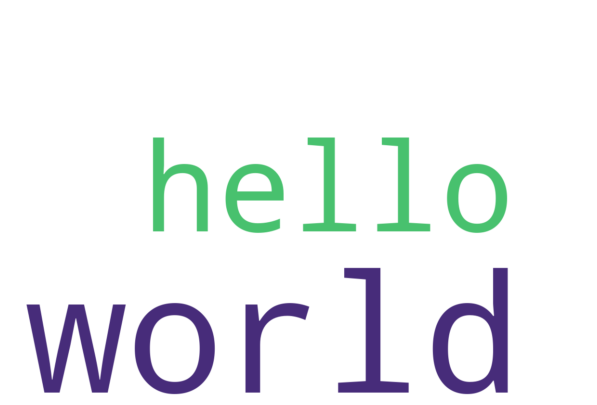

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 假设 word_freq 是一个词频字典
word_freq = {'hello': 1, 'world': 2}

wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


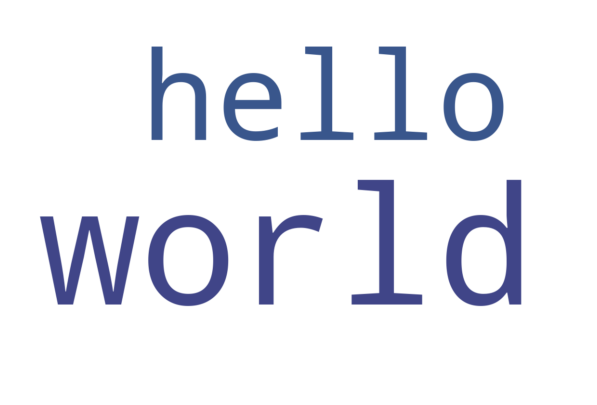

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# Assume word_freq is defined somewhere above this snippet
# word_freq = {'word1': frequency1, 'word2': frequency2, ...}

# Generating the word cloud
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white'
    # If you have a specific font you wish to use, specify its full path with font_path
    # font_path='/path/to/font.ttf'
).generate_from_frequencies(word_freq)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# Save the image before plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

# Now display the plot
plt.show()


In [ ]:
font_path='/absolute/path/to/arial.ttf'


In [19]:
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white'
).generate_from_frequencies(word_freq)


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

OSError: cannot open resource

# 拓展：还原成词根

In [22]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# 初始化词形还原器
lemmatizer = WordNetLemmatizer()

# 示例单词
word = "running"

# 进行词形还原
lemma = lemmatizer.lemmatize(word, pos='v') # 假设为动词

print(lemma)


[nltk_data] Downloading package wordnet to /Users/siliang/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/siliang/nltk_data...


run
